### Importando as bibliotecas necessárias ao projeto
### Importing the libraries needed by the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:>

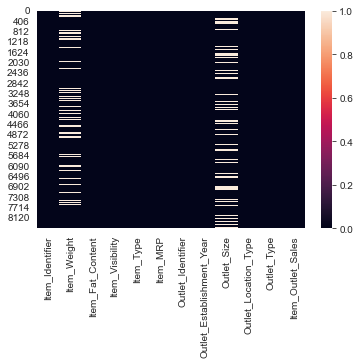

In [5]:
sns.heatmap(pd.isna(train))

In [4]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [3]:
def fat_pattern(fat):
    if(fat in 'Low Fat low fat LF lf'):
        return 0
    else:
        return 1

In [9]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [4]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(fat_pattern)

In [7]:
train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

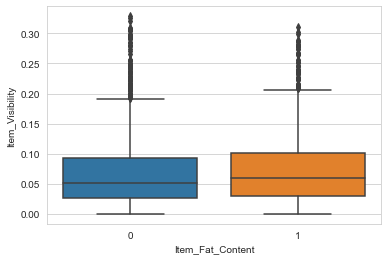

In [8]:
sns.boxplot(x='Item_Fat_Content', y='Item_Visibility', data=train)

In [9]:
train[pd.isna(train['Item_Weight'])].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,0,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,0,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [11]:
train[train['Item_Identifier'] == 'FDP10'].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,0,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,0,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,0,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842


In [25]:
train[train['Item_Identifier'] == 'DRI11'].head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,0,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,0,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,0,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,0,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834


In [36]:
np.mean(train[train['Item_Identifier'] == 'DRI11']['Item_Weight'])

8.26

In [38]:
train['Item_Identifier'].loc[3]

'FDX07'

In [5]:
train['Item_Weight'] = train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [20]:
train[train['Item_Identifier'] == 'FDP10'].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.0,0,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,0,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,0,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842


In [7]:
train[pd.isna(train['Item_Weight'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [27]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
train[pd.isna(train['Outlet_Size'])]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [14]:
train[pd.isna(train['Outlet_Size'])].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,1,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,1,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,0,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,1,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [33]:
train[pd.isna(train['Outlet_Location_Type']) | pd.isna(train['Outlet_Type'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [34]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [35]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [37]:
pd.get_dummies(train['Outlet_Location_Type'], drop_first=True)

,Tier 2,Tier 3
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
8518,0,1
8519,1,0
8520,1,0
8521,0,1


In [41]:
pd.get_dummies(train['Outlet_Type'])

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [15]:
train = pd.concat([train, pd.get_dummies(train['Outlet_Location_Type'], drop_first=True), pd.get_dummies(train['Outlet_Type'], drop_first=True)], axis=1)
train.drop(columns=['Outlet_Location_Type', 'Outlet_Type'], inplace=True)

In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,3735.1380,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,443.4228,0,1,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,2097.2700,0,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,732.3800,0,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,994.7052,0,1,1,0,0


In [44]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
out_train = train.drop(columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
                        'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier'], axis=1).dropna()

In [20]:
out_train.head()

,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1999,Medium,3735.1380,0,0,1,0,0
1,2009,Medium,443.4228,0,1,0,1,0
2,1999,Medium,2097.2700,0,0,1,0,0
4,1987,High,994.7052,0,1,1,0,0
5,2009,Medium,556.6088,0,1,0,1,0


In [21]:
out_test = train[pd.isna(train['Outlet_Size'])].drop(columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
                        'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size'], axis=1)

In [22]:
out_test.head()

,Outlet_Establishment_Year,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
3,1998,732.3800,0,1,0,0,0
8,2002,1076.5986,1,0,1,0,0
9,2007,4710.5350,1,0,1,0,0
25,2007,838.9080,1,0,1,0,0
28,1998,178.4344,0,1,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(out_train.drop('Outlet_Size', axis=1))

StandardScaler()

In [26]:
df_normalizado = scaler.transform(out_train.drop('Outlet_Size', axis=1))

In [27]:
df_param = pd.DataFrame(df_normalizado, columns=out_test.columns)

In [28]:
df_param.head(2)

,Outlet_Establishment_Year,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0.36255,0.811077,-0.423595,-0.91781,0.801496,-0.423058,-0.424937
1,1.49353,-1.079139,-0.423595,1.08955,-1.247666,2.363744,-0.424937


In [29]:
out_train.drop('Outlet_Size', axis=1).head(2)

,Outlet_Establishment_Year,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1999,3735.1380,0,0,1,0,0
1,2009,443.4228,0,1,0,1,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_param, out_train['Outlet_Size'], test_size=0.3)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
pred = knn.predict(x_test)

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       272
      Medium       1.00      1.00      1.00       877
       Small       1.00      1.00      1.00       685

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834



In [38]:
print(confusion_matrix(y_test, pred))

[[272   0   0]
 [  0 877   0]
 [  0   0 685]]


In [39]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
    

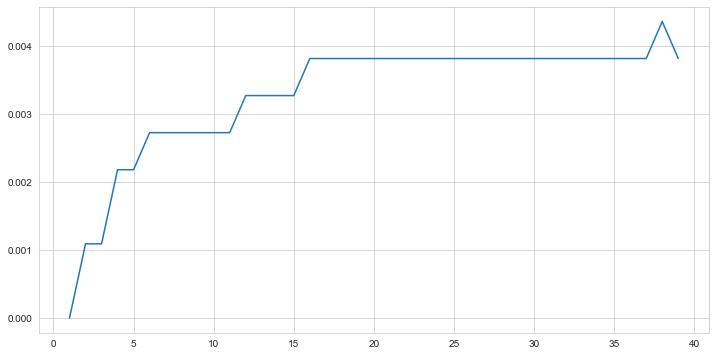

In [40]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate)

In [117]:
scaler.fit(out_test)

StandardScaler()

In [41]:
df_normalizado = scaler.transform(out_test)

In [42]:
df_param = pd.DataFrame(df_normalizado, columns=out_test.columns)

In [43]:
out = knn.predict(df_param)
len(out)

2410

In [44]:
out

array(['High', 'Small', 'Small', ..., 'High', 'Small', 'Small'],
      dtype=object)

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,3735.1380,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,443.4228,0,1,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,2097.2700,0,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,732.3800,0,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,994.7052,0,1,1,0,0


In [69]:
train[pd.isna(train['Outlet_Size'])]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [70]:
pd.Series(out).value_counts()

Small    1855
High      555
dtype: int64

In [71]:
a = train[pd.isna(train['Outlet_Size'])]['Outlet_Identifier']
b = out

In [74]:
#y_pred = [25, 26, 27, 28, 30]
#m = df['Records'].isna()

#df.loc[m, 'Records'] = y_pred
#pd.isna(train['Outlet_Size'])
train.loc[pd.isna(train['Outlet_Size']), 'Outlet_Size'] = b

In [75]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,3735.1380,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,443.4228,0,1,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,2097.2700,0,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,732.3800,0,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,994.7052,0,1,1,0,0


In [76]:
train[pd.isna(train['Outlet_Size'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3


<AxesSubplot:>

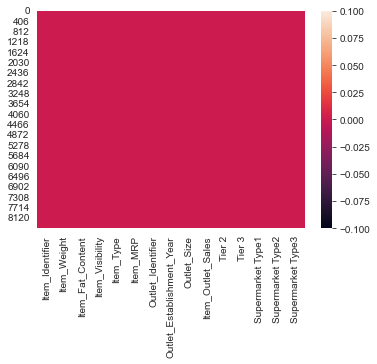

In [77]:
sns.heatmap(pd.isna(train))

In [83]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,3735.1380,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,443.4228,0,1,0,1,0


In [88]:
Size = pd.get_dummies(train['Outlet_Size'], drop_first=True)

In [90]:
train = pd.concat([train.drop('Outlet_Size', axis=1), Size], axis=1)

In [93]:
Out_Id = pd.get_dummies(train['Outlet_Identifier'])

In [95]:
train = pd.concat([train.drop('Outlet_Identifier', axis=1), Out_Id], axis=1)

In [96]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Tier 2,Tier 3,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,9.30,0,0.016047,Dairy,249.8092,1999,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,2009,443.4228,0,1,...,0,0,0,1,0,0,0,0,0,0


In [264]:
x = train.drop(columns=['Item_Identifier', 'Item_Type', 'Item_Outlet_Sales'])
y= train['Item_Outlet_Sales']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lm = LinearRegression()

In [266]:
lm.fit(X_train, y_train)

LinearRegression()

In [267]:
pred = lm.predict(X_test)

In [268]:
for i in range(0, len(pred)):
    if pred[i] < 0:
        pred[i] = 0

In [106]:
from sklearn import metrics

<AxesSubplot:xlabel='Item_Outlet_Sales'>

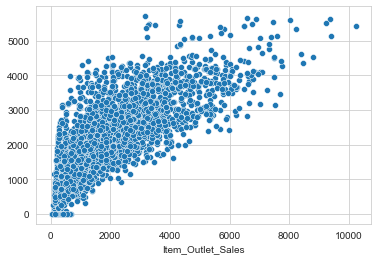

In [269]:
sns.scatterplot(x=y_test, y=pred)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

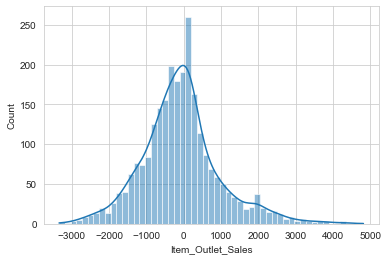

In [270]:
sns.histplot((y_test - pred), kde=True)

In [144]:
pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])

,Coefs
Item_Weight,1.890432
Item_Fat_Content,47.750848
Item_Visibility,-412.802261
Item_MRP,15.608996
Outlet_Establishment_Year,-6.784916
Tier 2,392.160693
Tier 3,184.540951
Supermarket Type1,792.578168
Supermarket Type2,46.054642
Supermarket Type3,848.890903


In [113]:
train[train['OUT010'] == 1]['Item_Outlet_Sales'].sum()

188340.17239999998

In [114]:
train[train['OUT027'] == 1]['Item_Outlet_Sales'].sum()

3453926.0514

In [271]:
print(f'MAE: {metrics.mean_absolute_error(y_test, pred)}\nMSE: {metrics.mean_squared_error(y_test,pred)}\nMRSE: {np.sqrt(metrics.mean_squared_error(y_test,pred))}')

MAE: 776.241259127826
MSE: 1118499.7699005655
MRSE: 1057.5914948128911


In [146]:
scaler = StandardScaler()
scaler.fit(x)
df_normalizado = scaler.transform(x)
df_param = pd.DataFrame(df_normalizado, columns=x.columns)

In [147]:
df_param.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,-0.769779,-0.738147,-0.970732,1.747454,0.139541,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,...,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,-1.497485,1.354743,-0.908111,-1.489023,1.334103,-0.696678,1.242650,-1.375891,2.860816,-0.351028,...,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,0.995661,-0.738147,-0.956917,0.010040,0.139541,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,...,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.361666,1.354743,-1.281758,0.660050,0.020085,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,...,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,-0.849439,-0.738147,-1.281758,-1.399220,-1.293934,-0.696678,1.242650,0.726802,-0.349551,-0.351028,...,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_param, y, test_size=0.3, random_state=101)

In [149]:
lm.fit(X_train, y_train)

LinearRegression()

In [150]:
pred = lm.predict(X_test)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

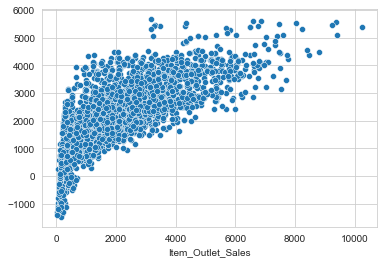

In [151]:
sns.scatterplot(x=y_test, y=pred)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

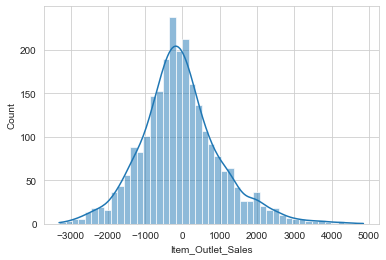

In [152]:
sns.histplot((y_test - pred), kde=True)

In [153]:
pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])

,Coefs
Item_Weight,9.465775e+00
Item_Fat_Content,2.131289e+01
Item_Visibility,-1.931123e+01
Item_MRP,9.698825e+02
Outlet_Establishment_Year,2.930949e+16
Tier 2,-1.281846e+16
Tier 3,1.139844e+16
Supermarket Type1,1.043963e+16
Supermarket Type2,-4.523545e+15
Supermarket Type3,1.475471e+16


In [154]:
print(f'MAE: {metrics.mean_absolute_error(y_test, pred)}\nMSE: {metrics.mean_squared_error(y_test,pred)}\nMRSE: {np.sqrt(metrics.mean_squared_error(y_test,pred))}')

MAE: 810.0893982114319
MSE: 1159296.8892536794
MRSE: 1076.7065009805037


In [155]:
test = pd.read_csv('test_AbJTz2l.csv')

In [156]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


<AxesSubplot:>

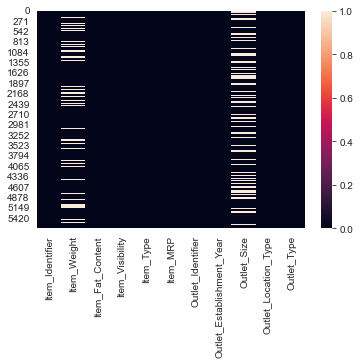

In [157]:
sns.heatmap(pd.isna(test))

In [158]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [160]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(fat_pattern)

In [161]:
test['Item_Weight'] = test['Item_Weight'].fillna(test.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

<AxesSubplot:>

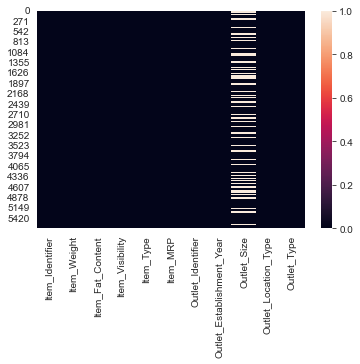

In [162]:
sns.heatmap(pd.isna(test))

In [190]:
test[test['Outlet_Identifier'] == 'OUT010'] = test[test['Outlet_Identifier'] == 'OUT010'].fillna('High')

In [194]:
test[test['Outlet_Identifier'] == 'OUT045'] = test[test['Outlet_Identifier'] == 'OUT045'].fillna('Small')

In [196]:
test[test['Outlet_Identifier'] == 'OUT017'] = test[test['Outlet_Identifier'] == 'OUT017'].fillna('Small')

In [197]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,High,Tier 3,Grocery Store
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,13.600,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [204]:
a = pd.get_dummies(test['Outlet_Type'], drop_first=True)
test = pd.concat([test.drop('Outlet_Type', axis=1), a], axis=1)

In [205]:
a = pd.get_dummies(test['Outlet_Type'], drop_first=True)
test = pd.concat([test.drop('Outlet_Type', axis=1), a], axis=1)

In [206]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.75,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,0,0,1,0,0
1,FDW14,8.30,1,0.038428,Dairy,87.3198,OUT017,2007,Small,1,0,1,0,0
2,NCN55,14.60,0,0.099575,Others,241.7538,OUT010,1998,High,0,1,0,0,0


In [207]:
a = pd.get_dummies(test['Outlet_Identifier'])
test = pd.concat([test.drop('Outlet_Identifier', axis=1), a], axis=1)

In [209]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Tier 2,Tier 3,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDW58,20.75,0,0.007565,Snack Foods,107.8622,1999,Medium,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.30,1,0.038428,Dairy,87.3198,2007,Small,1,0,...,0,0,1,0,0,0,0,0,0,0


In [211]:
a = pd.get_dummies(test['Outlet_Size'], drop_first=True)
test = pd.concat([test.drop('Outlet_Size', axis=1), a], axis=1)

In [213]:
test.drop(['Item_Identifier', 'Item_Type'], axis=1, inplace=True)

In [221]:
pred = lm.predict(test)

In [255]:
for i in range(0, len(pred)):
    if pred[i] < 0:
        pred[i] = 0

In [222]:
samp = pd.read_csv('sample_submission_8RXa3c6.csv')

In [223]:
samp.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [256]:
test2 = pd.read_csv('test_AbJTz2l.csv')

In [257]:
resp = test2[['Item_Identifier', 'Outlet_Identifier']]

In [258]:
resp.head(2)

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017


In [259]:
len(resp)

5681

In [260]:
len(pred)

5681

In [261]:
submit = pd.concat([resp, pd.Series(pred)], axis=1)

In [262]:
submit.rename(columns={0:'Item_Outlet_Sales'}, inplace=True)

In [263]:
submit.to_csv('submit2.csv', index=False)

In [237]:
train2 = pd.read_csv('train_v9rqX0R.csv')